In [1]:
import numpy as np
import pandas as pd
import csv

In [181]:
money = pd.read_csv("4.2.17_근로소득_연말정산_기부금_세액공제_현황2017_20230320000051.csv", encoding= "cp949")
money

,과세대상근로소득규모별(1),과세대상근로소득규모별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,과세대상근로소득규모별(1),과세대상근로소득규모별(2),정치자금기부금,정치자금기부금,법정기부금,법정기부금,우리사주조합기부금,우리사주조합기부금,지정기부금(종교단체외),지정기부금(종교단체외),지정기부금(종교단체),지정기부금(종교단체)
1,과세대상근로소득규모별(1),과세대상근로소득규모별(2),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원),인원 (명),공제세액 (백만원)
2,합계,소계,306812,20061,1916727,61746,6064,776,4336405,393884,1681109,835718
3,결정세액이 있는자,소계,297253,19125,1831351,55281,5631,743,4096866,375430,1458494,793432
4,결정세액이 있는자,1천만 이하,-,-,-,-,-,-,-,-,-,-
5,결정세액이 있는자,1.5천만 이하,95,0,118,0,-,-,86,4,69,7
6,결정세액이 있는자,2천만 이하,2809,31,4735,21,14,-,7417,207,3419,377
7,결정세액이 있는자,3천만 이하,33658,676,87328,562,242,10,211263,8049,53684,7940
8,결정세액이 있는자,4천만 이하,35482,1290,185970,1585,740,45,437998,22180,125196,33605
9,결정세액이 있는자,4.5천만 이하,17614,798,110588,1174,635,41,273919,16733,84017,28221


In [182]:
money_religion = money.iloc[4:19,[1,10,11]]
money_religion

,과세대상근로소득규모별(2),2021.8,2021.9
4,1천만 이하,-,-
5,1.5천만 이하,69,7
6,2천만 이하,3419,377
7,3천만 이하,53684,7940
8,4천만 이하,125196,33605
9,4.5천만 이하,84017,28221
10,5천만 이하,91644,34208
11,6천만 이하,189727,79514
12,8천만 이하,348044,170865
13,1억 이하,257014,149441


In [183]:
money_religion.columns = ['결정세액_규모', '인원', '지정기부금']

In [191]:
money_religion = money_religion.set_index('결정세액_규모')

In [192]:
money_religion.apply(pd.to_numeric)

,인원,지정기부금
결정세액_규모,,
1천만 이하,0,0
1.5천만 이하,69,7
2천만 이하,3419,377
3천만 이하,53684,7940
4천만 이하,125196,33605
4.5천만 이하,84017,28221
5천만 이하,91644,34208
6천만 이하,189727,79514
8천만 이하,348044,170865


In [189]:
money_religion.iloc[0,[1,2]] = 0

In [193]:
money_religion.dtypes

인원       object
지정기부금    object
dtype: object

In [197]:
each = ((money_religion['지정기부금']*1000000) / money_religion['인원']).round(0)

ZeroDivisionError: division by zero

In [196]:
money_religion

,인원,지정기부금
결정세액_규모,,
1천만 이하,0,0
1.5천만 이하,69,7
2천만 이하,3419,377
3천만 이하,53684,7940
4천만 이하,125196,33605
4.5천만 이하,84017,28221
5천만 이하,91644,34208
6천만 이하,189727,79514
8천만 이하,348044,170865


In [198]:
money_religion0 = pd.concat([money_religion, each], axis = 1)
money_religion0.columns = [ '인원', '지정기부금', '1인당_기부금']

In [208]:
money = money_religion0.reset_index()

In [209]:
money

,index,인원,지정기부금,1인당_기부금
0,1천만 이하,0,0,NaN
1,1.5천만 이하,69,7,101449.0
2,2천만 이하,3419,377,110266.0
3,3천만 이하,53684,7940,147903.0
4,4천만 이하,125196,33605,268419.0
5,4.5천만 이하,84017,28221,335896.0
6,5천만 이하,91644,34208,373270.0
7,6천만 이하,189727,79514,419097.0
8,8천만 이하,348044,170865,490929.0
9,1억 이하,257014,149441,581451.0


세금으로 인해 추산된 금액만 835718000000원 (8천억원) 규모이며, 한 사람당 위와 같은 경제적 가치를 가지고 있다.   
즉, 교회에게 한 사람 한 사람은 경제적 가치를 창출할 수 있는 수단이자 주 수입원이다. 

In [200]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

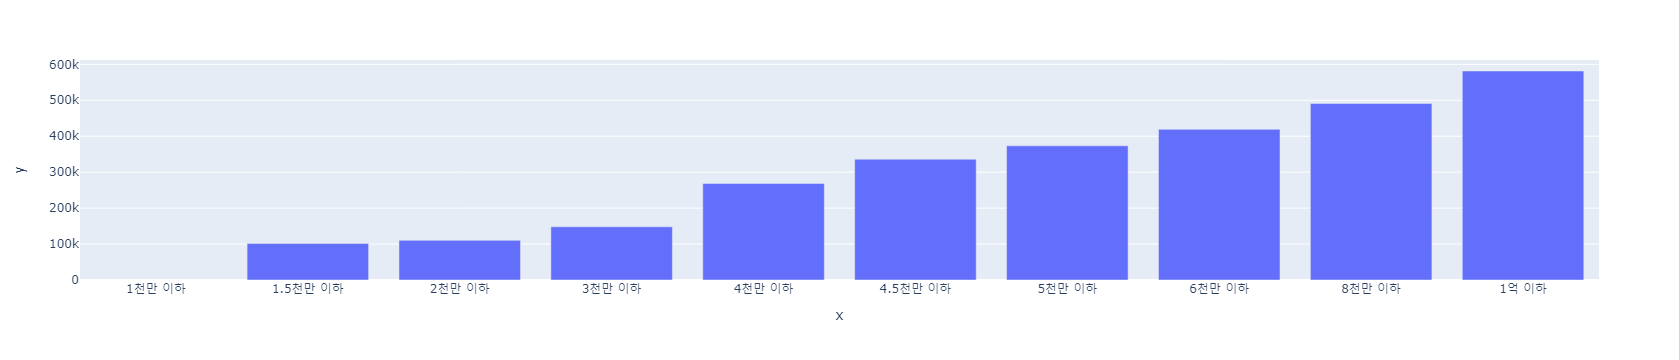

In [213]:
df = money.iloc[0:10, :]
fig = px.bar(x = df['index'], y = df['1인당_기부금'])

fig.show()